In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from skimage import data, io, filters, restoration, util,feature, img_as_ubyte, img_as_float
from skimage.color import rgb2gray
from skimage.filters.rank import mean, equalize
from skimage.morphology import disk
from skimage import exposure, measure
from skimage.morphology import reconstruction
from skimage.filters import sobel, threshold_otsu
from scipy import ndimage

# Read Beans Images

In [2]:
beans1 = io.imread('data/beans1.jpg')
#beans2 = io.imread('data/beans2.jpg')
beans3 = io.imread('data/beans3.jpg')
print('-----------------------------------------------------------------------')
print('Image shape is',beans1.shape, 'and type is',type(beans1))
print('Min =',beans1.min(),",Mean =",beans1.mean(),',Max = ',beans1.max())
print('dtype = ',beans1.dtype)
print('-----------------------------------------------------------------------')  

-----------------------------------------------------------------------
Image shape is (3024, 4032, 3) and type is <class 'numpy.ndarray'>
Min = 0 ,Mean = 167.89281772058104 ,Max =  242
dtype =  uint8
-----------------------------------------------------------------------


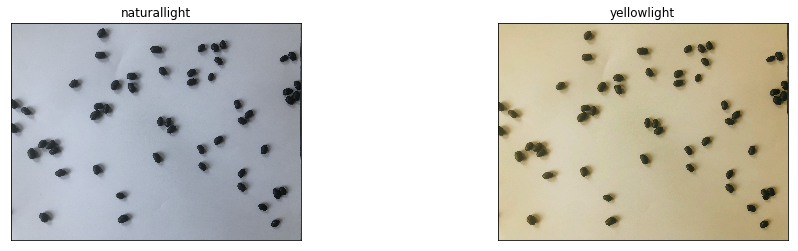

In [3]:
def show_plane(ax, plane, cmap="gray", title=None):
    ax.imshow(plane, cmap=cmap)
    ax.set_xticks([])
    ax.set_yticks([])
    
    if title:
        ax.set_title(title)
        
_, (a, c)= plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
show_plane(a, beans1, title="naturallight")
#show_plane(b, beans2, title="Gaussian_color") # rotated
show_plane(c, beans3, title="yellowlight")
    

# Image Transformations

/Users/winnielee/code/.virtualenvs/imageAnalysis/lib/python3.6/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


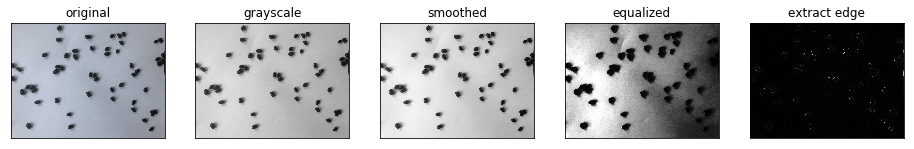

In [17]:
# grayscale
beans1_gray = rgb2gray(beans1)

# Smoothing
smoothed = img_as_ubyte(mean(beans1_gray, disk(2)))

# Global equalization
equalized = exposure.equalize_hist(beans1_gray)

# Extract edges
edge_sobel = sobel(beans1_gray)

_, (a, b, c, d, e)= plt.subplots(nrows=1, ncols=5, figsize=(16, 4))
show_plane(a, beans1, title="original")
show_plane(b, beans1_gray, title="grayscale")
show_plane(c, smoothed, title="smoothed")
show_plane(d, equalized, title="equalized")
show_plane(e, edge_sobel, title="extract edge")

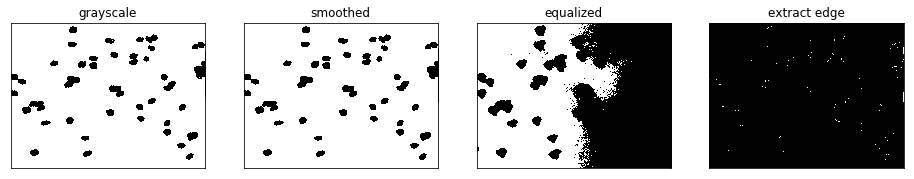

In [18]:
# all images 
all_images=[ beans1_gray, smoothed, equalized, edge_sobel]
# generate masks for thresholds for all images
masks=[image>threshold_otsu(image) for image in all_images]

_, (a, b, c, d)= plt.subplots(nrows=1, ncols=4, figsize=(16, 4))
#show_plane(a, masks[0], title="original")
show_plane(a, masks[0], title="grayscale")
show_plane(b, masks[1], title="smoothed")
show_plane(c, masks[2], title="equalized")
show_plane(d, masks[3], title="extract edge")

In [19]:
#labels,nlabels=ndimage.label(masks[0])
#print('( ) Mask generated from original: ',nlabels,'distinct beans.')
labels,nlabels=ndimage.label(masks[0])
print('( ) Mask generated from grayscale: ',nlabels,'distinct beans.')
labels,nlabels=ndimage.label(masks[1])
print('(v) Mask generated from smoothed: ',nlabels,'distinct beans.')
labels,nlabels=ndimage.label(masks[2])
print('( ) Mask generated from equalized: ',nlabels,'distinct beans.')
labels,nlabels=ndimage.label(masks[3])
print('( ) Mask generated from extract edge: ',nlabels,'distinct beans.')

( ) Mask generated from grayscale:  896 distinct beans.
(v) Mask generated from smoothed:  54 distinct beans.
( ) Mask generated from equalized:  13034 distinct beans.
( ) Mask generated from extract edge:  650 distinct beans.


## Other Methods: binary_fill_holes()

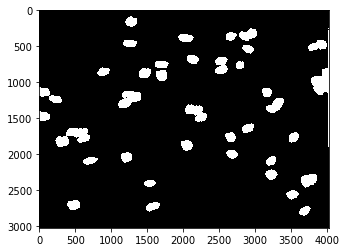

In [7]:
val = filters.threshold_otsu(smoothed)
drops = ndimage.binary_fill_holes(smoothed < val)
plt.imshow(drops, cmap='gray')
plt.show()

In [8]:
labels = measure.label(drops)
print('( ) Mask generated through from smoothed: ',labels.max(),'distinct beans.')

( ) Mask generated through from smoothed:  71 distinct beans.


# Segmentation and feature extraction

# Select Subimage (single bean)

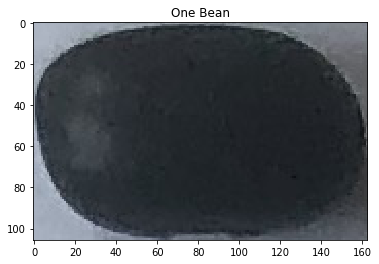

In [9]:
abean=beans1[331:437,1936:2099,:]
plt.title('One Bean')
plt.imshow(abean);

/Users/winnielee/code/.virtualenvs/imageAnalysis/lib/python3.6/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


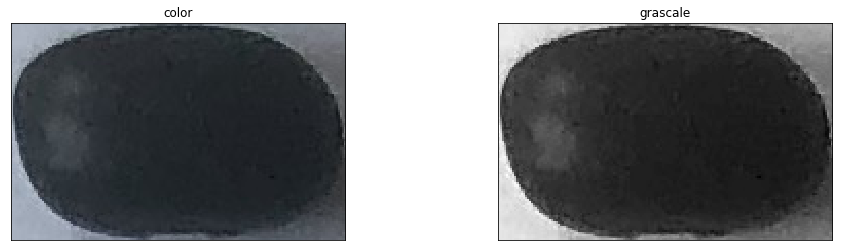

In [10]:
abean_gray = rgb2gray(abean)
abean_gray = img_as_ubyte(abean_gray)
_, (a, b)= plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
show_plane(a, abean, title="color")
show_plane(b, abean_gray, title="grascale")
#imshow(abean_gray, interpolation='nearest', cmap=plt.cm.gray)